http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,0.590137,0.494813,-0.600560,0.655434
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-03,1.016617,0.200230,-0.320543,-2.070979
2013-01-04,-1.210034,-0.782553,0.848286,-0.408840
2013-01-05,2.100674,0.312665,0.435878,-0.092920
2013-01-06,-1.281193,0.193371,0.379048,0.979764


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.590137,0.494813,-0.600560,0.655434
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-03,1.016617,0.200230,-0.320543,-2.070979
2013-01-04,-1.210034,-0.782553,0.848286,-0.408840
2013-01-05,2.100674,0.312665,0.435878,-0.092920


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.210034,-0.782553,0.848286,-0.408840
2013-01-05,2.100674,0.312665,0.435878,-0.092920
2013-01-06,-1.281193,0.193371,0.379048,0.979764


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.59013686,  0.49481313, -0.6005597 ,  0.65543384],
       [ 0.70914942, -0.04001591,  0.22919206, -0.08947367],
       [ 1.01661721,  0.2002297 , -0.32054347, -2.07097932],
       [-1.21003357, -0.78255331,  0.84828551, -0.40884003],
       [ 2.10067408,  0.31266549,  0.43587804, -0.09291962],
       [-1.28119305,  0.1933714 ,  0.37904808,  0.97976437]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.320892,0.063085,0.161883,-0.171169
std,1.325542,0.449488,0.531407,1.066441
min,-1.281193,-0.782553,-0.600560,-2.070979
25%,-0.759991,0.018331,-0.183110,-0.329860
50%,0.649643,0.196801,0.304120,-0.091197
75%,0.939750,0.284557,0.421671,0.469207
max,2.100674,0.494813,0.848286,0.979764


Transposing your data

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.590137,0.709149,1.016617,-1.210034,2.100674,-1.281193
B,0.494813,-0.040016,0.200230,-0.782553,0.312665,0.193371
C,-0.600560,0.229192,-0.320543,0.848286,0.435878,0.379048
D,0.655434,-0.089474,-2.070979,-0.408840,-0.092920,0.979764


Sorting by an axis

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.655434,-0.600560,0.494813,0.590137
2013-01-02,-0.089474,0.229192,-0.040016,0.709149
2013-01-03,-2.070979,-0.320543,0.200230,1.016617
2013-01-04,-0.408840,0.848286,-0.782553,-1.210034
2013-01-05,-0.092920,0.435878,0.312665,2.100674
2013-01-06,0.979764,0.379048,0.193371,-1.281193


Sorting by value

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-1.210034,-0.782553,0.848286,-0.408840
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-06,-1.281193,0.193371,0.379048,0.979764
2013-01-03,1.016617,0.200230,-0.320543,-2.070979
2013-01-05,2.100674,0.312665,0.435878,-0.092920
2013-01-01,0.590137,0.494813,-0.600560,0.655434


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01    0.590137
2013-01-02    0.709149
2013-01-03    1.016617
2013-01-04   -1.210034
2013-01-05    2.100674
2013-01-06   -1.281193
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.590137,0.494813,-0.600560,0.655434
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-03,1.016617,0.200230,-0.320543,-2.070979


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-03,1.016617,0.200230,-0.320543,-2.070979
2013-01-04,-1.210034,-0.782553,0.848286,-0.408840


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A    0.590137
B    0.494813
C   -0.600560
D    0.655434
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.590137,0.494813
2013-01-02,0.709149,-0.040016
2013-01-03,1.016617,0.200230
2013-01-04,-1.210034,-0.782553
2013-01-05,2.100674,0.312665
2013-01-06,-1.281193,0.193371


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.709149,-0.040016
2013-01-03,1.016617,0.200230
2013-01-04,-1.210034,-0.782553


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A    0.709149
B   -0.040016
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

0.59013686221715567

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -1.210034
B   -0.782553
C    0.848286
D   -0.408840
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.210034,-0.782553
2013-01-05,2.100674,0.312665


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.709149,0.229192
2013-01-03,1.016617,-0.320543
2013-01-05,2.100674,0.435878


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-03,1.016617,0.200230,-0.320543,-2.070979


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.494813,-0.600560
2013-01-02,-0.040016,0.229192
2013-01-03,0.200230,-0.320543
2013-01-04,-0.782553,0.848286
2013-01-05,0.312665,0.435878
2013-01-06,0.193371,0.379048


For getting a value explicitly

In [35]:
df.iloc[1,1]

-0.040015905295191764

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

-0.040015905295191764

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.590137,0.494813,-0.600560,0.655434
2013-01-02,0.709149,-0.040016,0.229192,-0.089474
2013-01-03,1.016617,0.200230,-0.320543,-2.070979
2013-01-05,2.100674,0.312665,0.435878,-0.092920


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,0.590137,0.494813,NaN,0.655434
2013-01-02,0.709149,NaN,0.229192,NaN
2013-01-03,1.016617,0.200230,NaN,NaN
2013-01-04,NaN,NaN,0.848286,NaN
2013-01-05,2.100674,0.312665,0.435878,NaN
2013-01-06,NaN,0.193371,0.379048,0.979764


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,0.590137,0.494813,-0.600560,0.655434,one
2013-01-02,0.709149,-0.040016,0.229192,-0.089474,one
2013-01-03,1.016617,0.200230,-0.320543,-2.070979,two
2013-01-04,-1.210034,-0.782553,0.848286,-0.408840,three
2013-01-05,2.100674,0.312665,0.435878,-0.092920,four
2013-01-06,-1.281193,0.193371,0.379048,0.979764,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.016617,0.200230,-0.320543,-2.070979,two
2013-01-05,2.100674,0.312665,0.435878,-0.092920,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.600560,5,NaN
2013-01-02,0.709149,-0.040016,0.229192,5,1.0
2013-01-03,1.016617,0.200230,-0.320543,5,2.0
2013-01-04,-1.210034,-0.782553,0.848286,5,3.0
2013-01-05,2.100674,0.312665,0.435878,5,4.0
2013-01-06,-1.281193,0.193371,0.379048,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.600560,-5,NaN
2013-01-02,-0.709149,-0.040016,-0.229192,-5,-1.0
2013-01-03,-1.016617,-0.200230,-0.320543,-5,-2.0
2013-01-04,-1.210034,-0.782553,-0.848286,-5,-3.0
2013-01-05,-2.100674,-0.312665,-0.435878,-5,-4.0
2013-01-06,-1.281193,-0.193371,-0.379048,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.600560,5,NaN,1.0
2013-01-02,0.709149,-0.040016,0.229192,5,1.0,1.0
2013-01-03,1.016617,0.200230,-0.320543,5,2.0,NaN
2013-01-04,-1.210034,-0.782553,0.848286,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.709149,-0.040016,0.229192,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.600560,5,5.0,1.0
2013-01-02,0.709149,-0.040016,0.229192,5,1.0,1.0
2013-01-03,1.016617,0.200230,-0.320543,5,2.0,5.0
2013-01-04,-1.210034,-0.782553,0.848286,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A    0.222536
B   -0.019384
C    0.161883
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    1.099860
2013-01-02    1.379665
2013-01-03    1.579261
2013-01-04    1.371140
2013-01-05    2.369844
2013-01-06    1.858245
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.016617,-0.799770,-1.320543,4.0,1.0
2013-01-04,-4.210034,-3.782553,-2.151714,2.0,0.0
2013-01-05,-2.899326,-4.687335,-4.564122,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.600560,5,NaN
2013-01-02,0.709149,-0.040016,-0.371368,10,1.0
2013-01-03,1.725767,0.160214,-0.691911,15,3.0
2013-01-04,0.515733,-0.622340,0.156374,20,6.0
2013-01-05,2.616407,-0.309674,0.592252,25,10.0
2013-01-06,1.335214,-0.116303,0.971301,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    3.381867
B    1.095219
C    1.448845
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    4
1    6
2    6
3    4
4    0
5    5
6    5
7    0
8    1
9    5
dtype: int64

In [68]:
s.value_counts()

5    3
6    2
4    2
0    2
1    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,-0.073707,0.113948,0.993550,-0.126409
1,-0.879505,1.128825,-1.156491,-0.477256
2,-0.557743,-1.222718,-0.186748,1.748032
3,-0.218886,-0.137126,-0.502761,-0.575572
4,-0.966651,-0.411031,-1.325198,2.572911
5,0.680350,-2.623569,0.521728,-0.295634
6,-0.147139,-1.109384,0.264081,0.803002
7,0.052334,0.056590,2.139726,-0.396421
8,-0.155261,-0.255606,0.189822,1.681479
9,0.702835,0.730323,-0.060164,0.098319


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.073707,0.113948,0.993550,-0.126409
1,-0.879505,1.128825,-1.156491,-0.477256
2,-0.557743,-1.222718,-0.186748,1.748032
3,-0.218886,-0.137126,-0.502761,-0.575572
4,-0.966651,-0.411031,-1.325198,2.572911
5,0.680350,-2.623569,0.521728,-0.295634
6,-0.147139,-1.109384,0.264081,0.803002
7,0.052334,0.056590,2.139726,-0.396421
8,-0.155261,-0.255606,0.189822,1.681479
9,0.702835,0.730323,-0.060164,0.098319


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,-0.724832,-0.812926,0.426890,1.608133
1,-0.234685,-0.259288,0.001489,0.879627
2,-1.856949,1.494346,0.052203,-0.076712
3,1.818693,-2.261017,-0.886900,0.470881
4,0.179085,0.148858,2.151749,1.222136
5,-0.929243,0.184513,0.449944,1.413494
6,0.306251,-0.463922,-1.081181,-0.276903
7,0.096089,0.659270,0.463800,0.208886


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.724832,-0.812926,0.426890,1.608133
1,-0.234685,-0.259288,0.001489,0.879627
2,-1.856949,1.494346,0.052203,-0.076712
3,1.818693,-2.261017,-0.886900,0.470881
4,0.179085,0.148858,2.151749,1.222136
5,-0.929243,0.184513,0.449944,1.413494
6,0.306251,-0.463922,-1.081181,-0.276903
7,0.096089,0.659270,0.463800,0.208886
8,1.818693,-2.261017,-0.886900,0.470881


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,-0.985704,-0.341157
1,bar,one,-1.072500,2.401830
2,foo,two,-0.331605,0.629886
3,bar,three,-0.968248,-0.215853
4,foo,two,1.176191,2.296946
5,bar,two,-0.702649,1.298970
6,foo,one,-0.424088,0.437996
7,foo,three,1.794078,0.740773


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.743397,3.484947
foo,1.228872,3.764444


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.072500  2.401830
    three -0.968248 -0.215853
    two   -0.702649  1.298970
foo one   -1.409792  0.096839
    three  1.794078  0.740773
    two    0.844586  2.926832

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -1.341532 -0.955068
      two     1.841941  1.008194
baz   one    -0.497056 -0.658911
      two     0.095111 -0.676527

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -1.341532
               B   -0.955068
       two     A    1.841941
               B    1.008194
baz    one     A   -0.497056
               B   -0.658911
       two     A    0.095111
               B   -0.676527
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -1.341532 -0.955068
      two     1.841941  1.008194
baz   one    -0.497056 -0.658911
      two     0.095111 -0.676527

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.341532  1.841941
      B -0.955068  1.008194
baz   A -0.497056  0.095111
      B -0.658911 -0.676527

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.341532 -0.497056
       B -0.955068 -0.658911
two    A  1.841941  0.095111
       B  1.008194 -0.676527

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,-1.556658,-0.375059
1,one,B,foo,-1.143123,-0.185167
2,two,C,foo,0.164343,1.505834
3,three,A,bar,0.552859,-2.419954
4,one,B,bar,1.722934,-0.980402
5,one,C,bar,0.149579,-2.056759
6,two,A,foo,0.035807,-1.020969
7,three,B,foo,-0.157884,1.221896
8,one,C,foo,-1.205388,0.626057
9,one,A,bar,0.377238,1.487879


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.377238 -1.556658
      B  1.722934 -1.143123
      C  0.149579 -1.205388
three A  0.552859       NaN
      B       NaN -0.157884
      C -1.968247       NaN
two   A       NaN  0.035807
      B  0.129950       NaN
      C       NaN  0.164343

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    25943
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06    1.115400
2012-03-07   -0.491741
2012-03-08   -1.137449
2012-03-09    0.116247
2012-03-10    0.324780
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00    1.115400
2012-03-07 00:00:00+00:00   -0.491741
2012-03-08 00:00:00+00:00   -1.137449
2012-03-09 00:00:00+00:00    0.116247
2012-03-10 00:00:00+00:00    0.324780
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.115400
2012-03-06 19:00:00-05:00   -0.491741
2012-03-07 19:00:00-05:00   -1.137449
2012-03-08 19:00:00-05:00    0.116247
2012-03-09 19:00:00-05:00    0.324780
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -1.302401
2012-02-29   -0.831924
2012-03-31   -0.319241
2012-04-30    0.369824
2012-05-31   -0.926371
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -1.302401
2012-02   -0.831924
2012-03   -0.319241
2012-04    0.369824
2012-05   -0.926371
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -1.302401
2012-02-01   -0.831924
2012-03-01   -0.319241
2012-04-01    0.369824
2012-05-01   -0.926371
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00    0.344813
1990-06-01 09:00   -0.454056
1990-09-01 09:00   -0.466954
1990-12-01 09:00    0.076502
1991-03-01 09:00   -0.544376
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

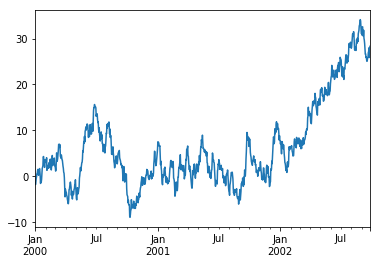

In [130]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

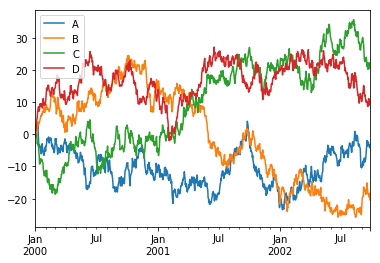

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.770975,0.059340,0.538718,0.698703
1,2000-01-02,2.818848,1.607370,0.365436,0.786933
2,2000-01-03,2.205740,2.578199,0.246370,1.237871
3,2000-01-04,1.496832,0.789122,-0.736018,1.780647
4,2000-01-05,2.201199,-0.040070,-0.229423,3.938197
5,2000-01-06,1.772139,-0.317884,-0.917398,4.561323
6,2000-01-07,2.862851,2.545837,-2.831284,5.132198
7,2000-01-08,1.821744,2.409172,-2.608537,6.720323
8,2000-01-09,2.876346,2.756265,-3.352250,7.505591
9,2000-01-10,0.774263,3.855531,-2.268586,8.153035


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.770975,0.059340,0.538718,0.698703
2000-01-02,2.818848,1.607370,0.365436,0.786933
2000-01-03,2.205740,2.578199,0.246370,1.237871
2000-01-04,1.496832,0.789122,-0.736018,1.780647
2000-01-05,2.201199,-0.040070,-0.229423,3.938197
2000-01-06,1.772139,-0.317884,-0.917398,4.561323
2000-01-07,2.862851,2.545837,-2.831284,5.132198
2000-01-08,1.821744,2.409172,-2.608537,6.720323
2000-01-09,2.876346,2.756265,-3.352250,7.505591
2000-01-10,0.774263,3.855531,-2.268586,8.153035


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,1.770975,0.059340,0.538718,0.698703
2000-01-02,2.818848,1.607370,0.365436,0.786933
2000-01-03,2.205740,2.578199,0.246370,1.237871
2000-01-04,1.496832,0.789122,-0.736018,1.780647
2000-01-05,2.201199,-0.040070,-0.229423,3.938197
2000-01-06,1.772139,-0.317884,-0.917398,4.561323
2000-01-07,2.862851,2.545837,-2.831284,5.132198
2000-01-08,1.821744,2.409172,-2.608537,6.720323
2000-01-09,2.876346,2.756265,-3.352250,7.505591
2000-01-10,0.774263,3.855531,-2.268586,8.153035


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.